In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [11]:
bank = pd.read_csv("D:\\PROGRAMMING\\DATASETS\\UniversalBank.csv")
print(bank.shape)
bank.head()

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
## dropping unnecessary columns
bank = bank.drop(["ID", "ZIP Code"], axis=1)
print(bank.shape)
bank.head()

(5000, 12)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<Axes: >

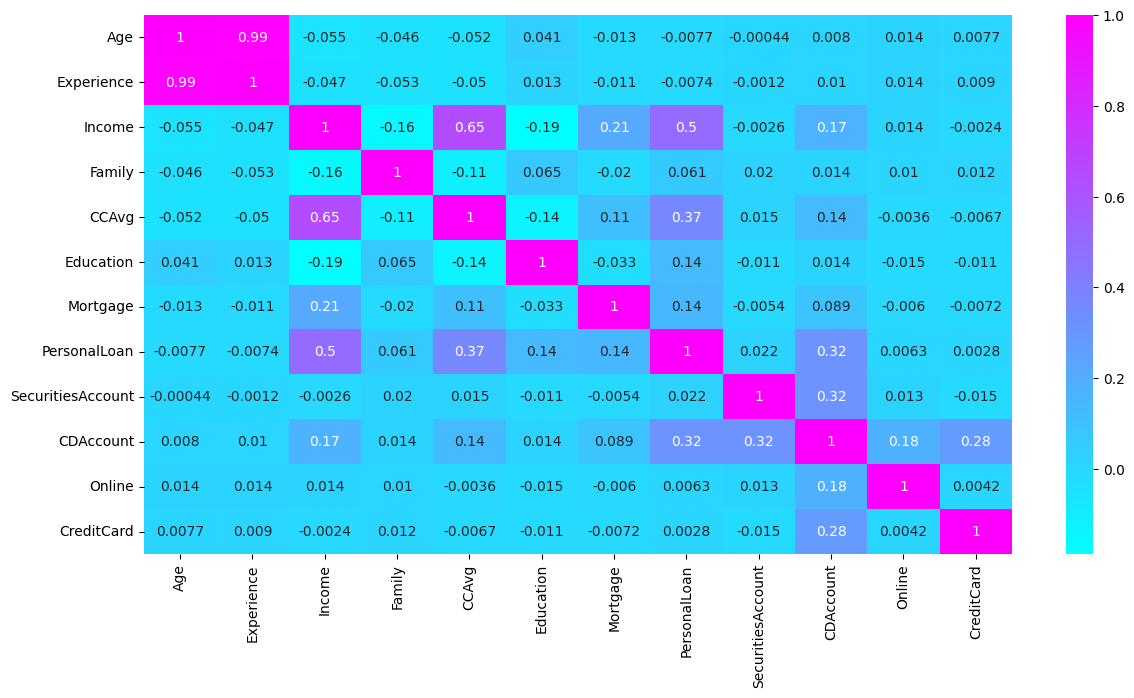

In [18]:
plt.figure(figsize=(14, 7))
sb.heatmap(bank.corr(), annot=True, cmap='cool')

##### Separating 0 and 1 data

In [19]:
zero_data = bank[bank.CreditCard==0]
zero_data.shape

(3530, 12)

In [20]:
one_data = bank[bank.CreditCard==1]
one_data.shape

(1470, 12)

##### Independent Dependent Split

In [23]:
X = bank.iloc[:, :-1]
y = bank.iloc[:, -1]

##### Scalling

In [25]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [28]:
X = pd.DataFrame(X, columns=bank.columns[:-1])
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


##### Train Test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Train & Predict

In [30]:
sv = SVC()
sv.fit(X_train, y_train)
y_predict = sv.predict(X_test)

##### Evaluation

In [31]:
print(metrics.accuracy_score(y_test, y_predict))

0.749


In [33]:
cm = metrics.confusion_matrix(y_test, y_predict)

<Axes: >

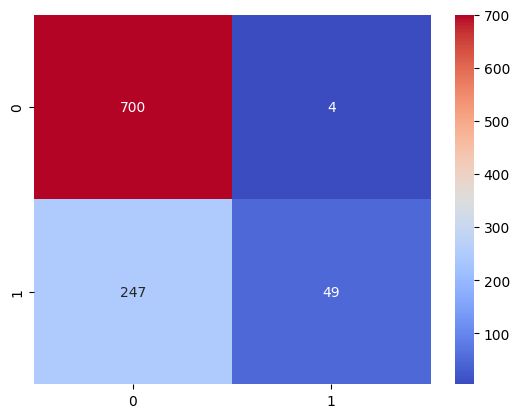

In [37]:
sb.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")

In [38]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



### Kernels

In [42]:
## Linear kernel

lc = SVC(kernel="linear")
lc.fit(X_train, y_train)
y_pred_lc = lc.predict(X_test)

In [40]:
metrics.accuracy_score(y_test, y_pred_lc)

0.747

<Axes: >

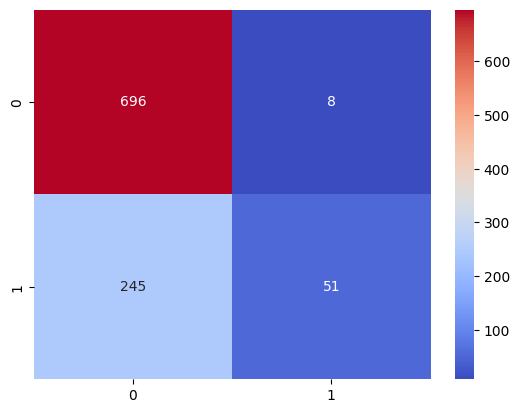

In [41]:
sb.heatmap(metrics.confusion_matrix(y_test, y_pred_lc), annot=True, fmt='d', cmap='coolwarm')

In [43]:
## RBF Kernel

rc = SVC(kernel="rbf")
rc.fit(X_train, y_train)
y_pred_rc = rc.predict(X_test)

In [44]:
metrics.accuracy_score(y_test, y_pred_rc)

0.749

<Axes: >

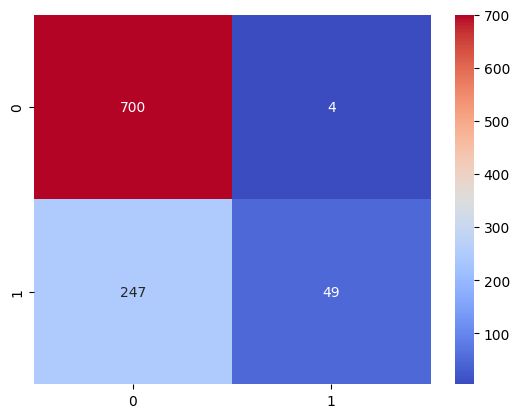

In [45]:
sb.heatmap(metrics.confusion_matrix(y_test, y_pred_rc), annot=True, fmt='d', cmap='coolwarm')

In [46]:
## Sigmoid Kernel

sk = SVC(kernel="sigmoid", C=1)
sk.fit(X_train, y_train)
y_pred_sk = sk.predict(X_test)

In [47]:
metrics.accuracy_score(y_test, y_pred_sk)

0.629

<Axes: >

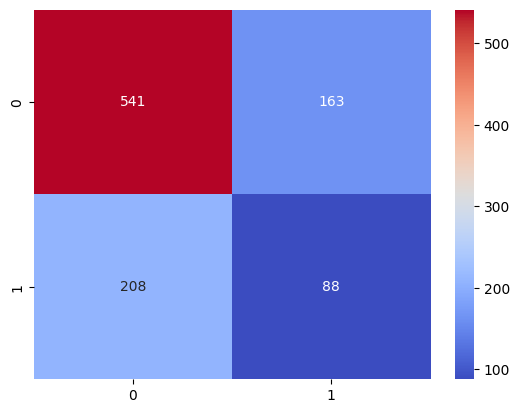

In [48]:
sb.heatmap(metrics.confusion_matrix(y_test, y_pred_sk), annot=True, fmt='d', cmap='coolwarm')

`RBF` kernel is best!